### **РК1**

# Серов Савелий Сергеевич ИУ5-61Б
# Вариант 12

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('heart.csv')
data.columns = data.columns.str.strip()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропусков нет, так что образуем 5% искусственно. Также сделаем sex категориальным

In [4]:
data['sex'] = data['sex'].map({0: 'female', 1: 'male'})
for col in ['age', 'sex']:
     missing_indices = data.sample(frac=0.05, random_state=52).index
     data.loc[missing_indices, col] = np.nan

In [5]:
data.isnull().sum()

age         51
sex         51
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

In [6]:
from sklearn.impute import SimpleImputer
# Создаем копию колонки для импутации (SimpleImputer ожидает 2D данные)
age_data = data[['age']].copy()

strategy = 'median'

# Создаем и обучаем импутер
imputer = SimpleImputer(strategy=strategy)
imputed_age = imputer.fit_transform(age_data)

data['age'] = imputed_age

In [7]:
# Заменим пропуски в sex модой
mode_rating = data['sex'].mode()[0]
print('Мода для sex:', mode_rating)
data['sex'] = data['sex'].fillna(mode_rating)

Мода для sex: male


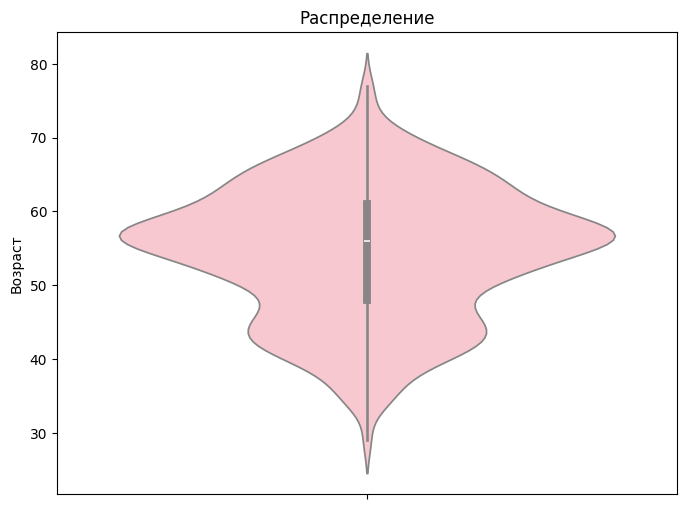

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.violinplot(y=data['age'], color='pink')
plt.title('Распределение')
plt.ylabel('Возраст')
plt.show()

### **Для дальнейшего построения моделей МО я бы использовал все признаки этого датасета, поскольку все они являются медицинскими показателями, влияющими на таргетный признак**